<a href="https://colab.research.google.com/github/khodjasCode/for_mohirdev/blob/main/polynomial_rn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
df = pd.read_csv(url)

In [3]:
df

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


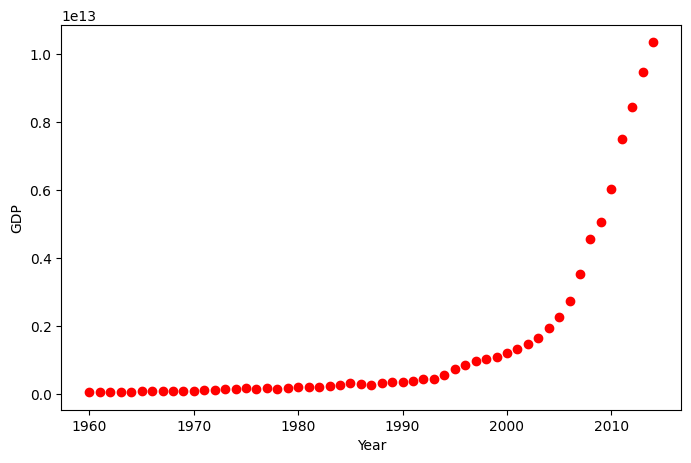

In [4]:
plt.figure(figsize = (8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

NORMALIZATION

In [5]:
X = np.asanyarray(df[['Year']]/df['Year'].max())
y = np.asanyarray(df[['Value']]/df['Value'].max())

Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
yhat = model.predict(X)

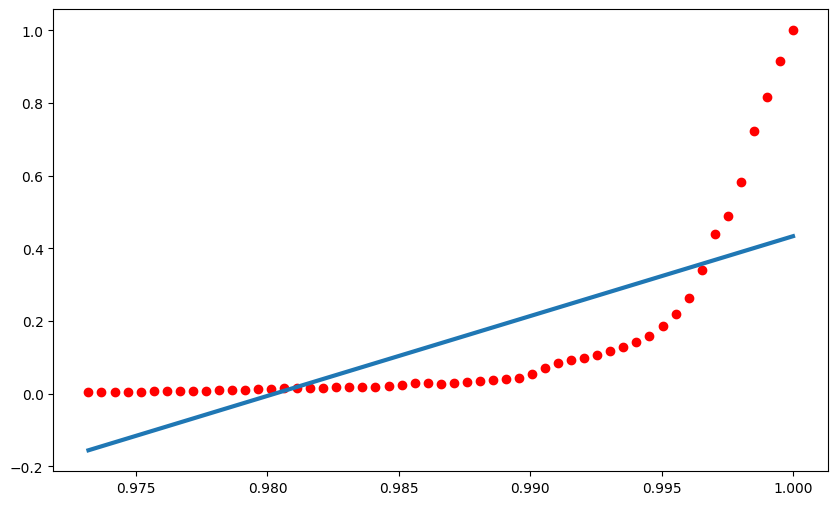

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(X, y, 'ro', label = 'data')
plt.plot(X, yhat, linewidth = 3.0, label = 'fit')
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error

print('MAE: ', mean_absolute_error(yhat, y))

MAE:  0.12657979406214762


In [10]:
X[0]

array([0.97318769])

Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 5, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [12]:
model.fit(X_poly, y)

LinearRegression()

In [13]:
yhat = model.predict(X_poly)

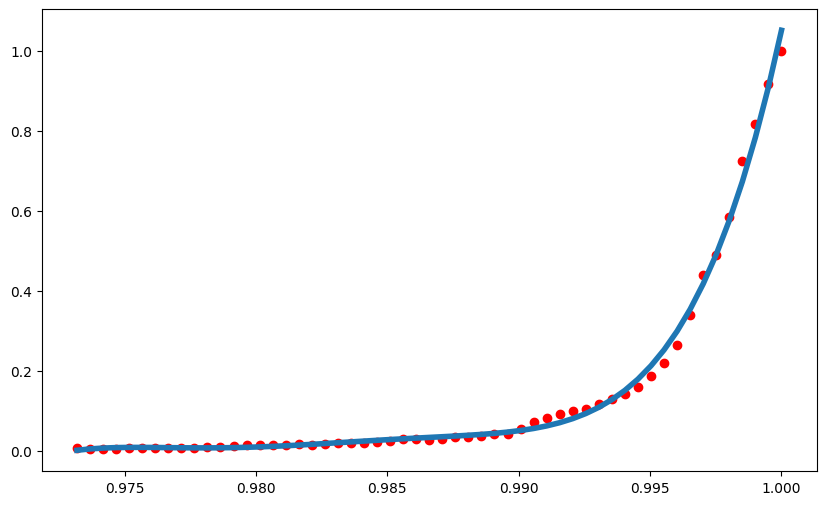

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(X, y, 'ro', label='data')
plt.plot(X, yhat, linewidth = 4.0, label = 'fit')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error

print('MAE: ', mean_absolute_error(yhat, y))

MAE:  0.009253921906050316


TRAIN/TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.1, random_state = 42)

In [17]:
x_train = np.asanyarray(train_set[['Year']]/train_set[['Year']].max())
y_train = np.asanyarray(train_set[['Value']]/train_set[['Value']].max())

x_test = np.asanyarray(test_set[['Year']]/test_set[['Year']].max())
y_test = np.asanyarray(test_set[['Value']]/test_set[['Value']].max())

ML

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 3, include_bias = False)
X_poly = poly_features.fit_transform(x_train)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

Rating the model

In [20]:
X_test_poly = poly_features.fit_transform(x_test)
y_predict = model.predict(X_test_poly)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE: ', mean_absolute_error(y_predict, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_predict, y_test)))

MAE:  0.035656851361453225
RMSE:  0.041327810156532835


PIPELINE

In [22]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 5, include_bias = False)),
    ('model', LinearRegression())
])

polynomial_regression.fit(x_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('model', LinearRegression())])

In [23]:
y_predict = polynomial_regression.predict(x_test)

In [24]:
MAE = mean_absolute_error(y_predict, y_test)
RMSE = np.sqrt(mean_squared_error(y_predict, y_test))

print('MAE: ', MAE)
print('RMSE: ', RMSE)

MAE:  0.01711478063470467
RMSE:  0.023054468327809226


CURVE FIT

In [25]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [26]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [27]:
from scipy.optimize import curve_fit
beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517092123388
beta2=0.9972071272529931


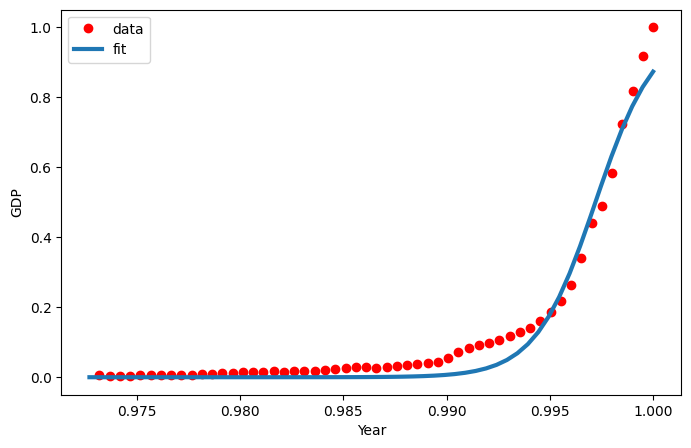

In [28]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [29]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.030498418823495136
